In [1]:
import tensorflow as tf


In [2]:
# import the libraries as shown below
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Activation
from tensorflow.keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
from glob import glob
from tensorflow.keras.optimizers import Adam

In [3]:
# resize all the images
IMAGE_SIZE=[150,150]
train_path='D:\datasets\Masstech\diet project\dataset\AUG - Copy\train'
test_path='D:\datasets\Masstech\diet project\dataset\AUG - Copy\test'

In [4]:
print(len(train_path))
print(len(test_path))

57
56


In [5]:
from sklearn.metrics import confusion_matrix
import itertools


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# epochs=10
# batch_size=18

C:\Users\VPW\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
# # import inception V3
# # we will use imagenet weights here
# inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [7]:
# #dont training withexisting weights coz we are using transfer learning technique
# for layer in inception.layers:
#     layer.trainable=False

In [8]:
import os
os.chdir('D:\datasets\Masstech\diet project\dataset')

In [9]:
# useful for getting number of output classses
folders = glob('AUG - Copy/train/*')

In [10]:
len(folders)

9

In [11]:
# x=Flatten()(inception.output)
# prediction=Dense(len(folders),activation='softmax')(x)
# model=Model(inputs= inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4

In [13]:
# #the model compiling
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )

In [14]:
# Use the Image Data Generator to import the images from the dataset ## data augementation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
#training
training_set = train_datagen.flow_from_directory('AUG - Copy/train',
                                                 target_size = (150, 150),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 699 images belonging to 9 classes.


In [16]:
test_set = test_datagen.flow_from_directory('AUG - Copy/test',
                                            target_size = (150, 150),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 159 images belonging to 9 classes.


In [17]:
# fit the model
# Run
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\VPW\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
44/44 [==============================] - 22s 488ms/step - loss: 2.4498 - accuracy: 0.1259 - val_loss: 2.1973 - val_accuracy: 0.1006
Epoch 2/50
44/44 [==============================] - 13s 304ms/step - loss: 2.1838 - accuracy: 0.1187 - val_loss: 2.1792 - val_accuracy: 0.1509
Epoch 3/50
44/44 [==============================] - 14s 323ms/step - loss: 2.1412 - accuracy: 0.1817 - val_loss: 2.1282 - val_accuracy: 0.1698
Epoch 4/50
44/44 [==============================] - 13s 299ms/step - loss: 1.9944 - accuracy: 0.2561 - val_loss: 1.9739 - val_accuracy: 0.3836
Epoch 5/50
44/44 [==============================] - 13s 294ms/step - loss: 1.7634 - accuracy: 0.2918 - val_loss: 1.7351 - val_accuracy: 0.3270
Epoch 6/50
44/44 [==============================] - 13s 297ms/step - loss: 1.6417 - accuracy: 0.3891 - val_loss: 1.6070 - val_accuracy: 0.4277
Epoch 7/50
44/44 [==============================] - 13s 304ms/step - loss: 1.4755 - accuracy: 0.4406 - val_loss: 1.4040 - val_accuracy: 0.4654

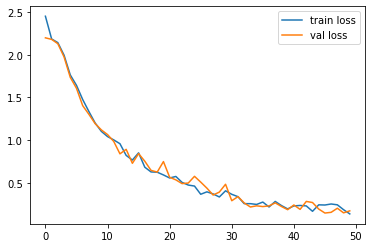

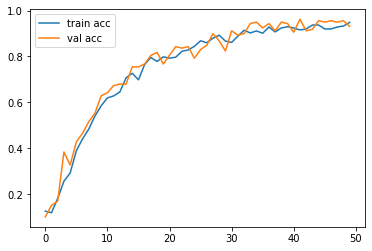

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')
# acc = r.history['acc']

# val_acc = r.history['val_acc']

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')